In [26]:
import numpy as np
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
import mysql.connector
import warnings
warnings.filterwarnings('ignore')

In [27]:
mydb = mysql.connector.connect(
  host="localhost",
  user="root",
  password="Password",
  database='database1'
)
print(mydb)

In [28]:
# Loading the dataset from MySQL which is from table named testtable2
import pandas as pd
df=pd.read_sql_query("select * from testtable2",mydb)
df

,Name,Gender,DOB,Maths,Physics,Chemistry,English,Biology,Economics,History,Civics
0,John,M,5/4/1988,55,45,56,87,21,52,89,65
1,Suresh,M,4/5/1987,75,96,78,64,90,61,58,2
2,Ramesh,M,25/5/1989,25,54,89,76,95,87,56,74
3,Jessica,F,12/8/1990,78,96,86,63,54,89,75,45
4,Jennifer,F,2/9/1989,58,96,78,46,96,77,83,53
5,Annu,F,5/4/1988,45,87,52,89,55,89,87,52
6,pooja,F,4/5/1987,55,64,61,58,75,58,64,61
7,Ritesh,M,25/5/1989,54,76,87,56,25,56,76,87
8,Farha,F,12/8/1990,55,63,89,75,78,75,63,89
9,Mukesh,M,2/9/1989,96,46,77,83,58,83,46,77


# Exploratory Data Analysis

In [29]:
#Checking for the columns in dataframe
df.columns

Index(['Name', 'Gender', 'DOB', 'Maths', 'Physics', 'Chemistry', 'English',
       'Biology', 'Economics', 'History', 'Civics'],
      dtype='object')

In [30]:
#Checking the shape of our dataframe
df.shape

(10, 11)

###### There are 10 rows and 11 columns in the dataset

In [31]:
df.dtypes

Name         object
Gender       object
DOB          object
Maths         int64
Physics       int64
Chemistry     int64
English       int64
Biology       int64
Economics     int64
History       int64
Civics        int64
dtype: object

###### Observations: The columns Name,Gender and DOB are of object type and the remaining columns are of int type.

In [32]:
#Checking the information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Name       10 non-null     object
 1   Gender     10 non-null     object
 2   DOB        10 non-null     object
 3   Maths      10 non-null     int64 
 4   Physics    10 non-null     int64 
 5   Chemistry  10 non-null     int64 
 6   English    10 non-null     int64 
 7   Biology    10 non-null     int64 
 8   Economics  10 non-null     int64 
 9   History    10 non-null     int64 
 10  Civics     10 non-null     int64 
dtypes: int64(8), object(3)
memory usage: 1008.0+ bytes


###### Observations:

###### ==> There are 10 rows and 11 columns are present in the dataset.

###### ==> There are no missing/null values are present in the dataset.

###### ==> Name and Gender are of object data type,DOB is of date datatype and the remaining columns are of int type.

In [33]:
# Checking for count of unique values in each feature
for i in  df.columns:
    print(i,df[i].nunique())

Name 10
Gender 2
DOB 5
Maths 8
Physics 8
Chemistry 8
English 10
Biology 10
Economics 9
History 10
Civics 10


## Summary Statistics

In [34]:
df.describe()

,Maths,Physics,Chemistry,English,Biology,Economics,History,Civics
count,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.0000
mean,59.600000,72.300000,75.300000,69.700000,64.700000,72.700000,69.700000,60.5000
std,19.460501,20.661559,14.000397,14.453373,26.998148,14.629119,14.453373,25.3432
min,25.000000,45.000000,52.000000,46.000000,21.000000,52.000000,46.000000,2.0000
25%,54.250000,56.250000,65.000000,59.250000,54.250000,58.750000,59.250000,52.2500
50%,55.000000,70.000000,78.000000,69.500000,66.500000,76.000000,69.500000,63.0000
75%,70.750000,93.750000,86.750000,81.250000,87.000000,86.000000,81.250000,76.2500
max,96.000000,96.000000,89.000000,89.000000,96.000000,89.000000,89.000000,89.0000


######  Observations:

###### ==> Minimum number of marked scored in Civics that is 2.

###### ==> The subjects with maximum score are Maths,Physics and Biology that is 96.

###### ==> Standard deviation is maximum in Biology and Civics.

# Data Visualization

In [35]:
df['Gender'].value_counts()

F    5
M    5
Name: Gender, dtype: int64

<AxesSubplot:xlabel='Gender', ylabel='count'>

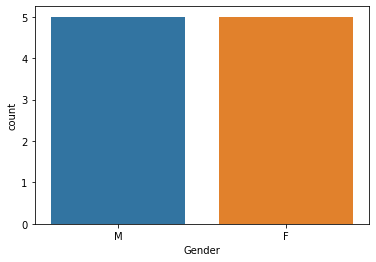

In [36]:
sns.countplot(df['Gender'])

###### There are equal number of Male and Female in the dataset that is  5 in each gender

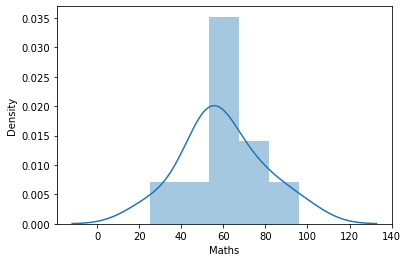

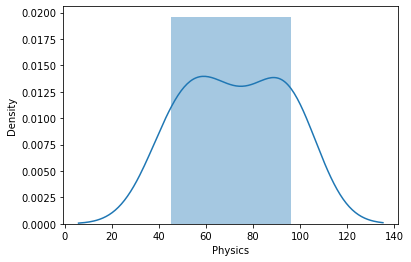

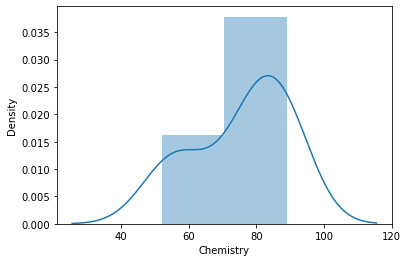

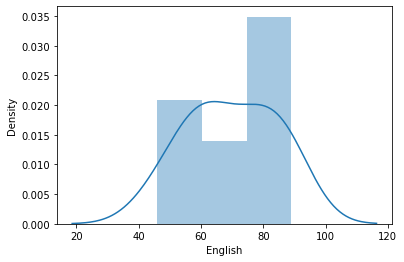

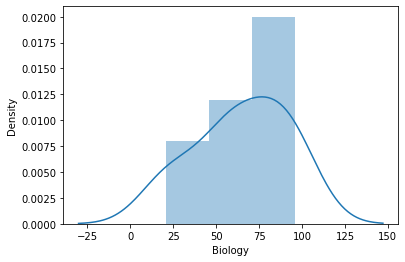

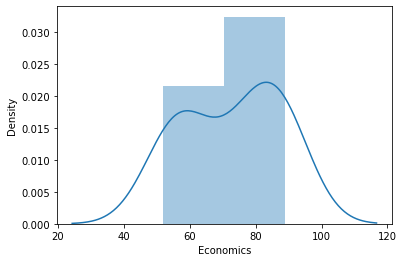

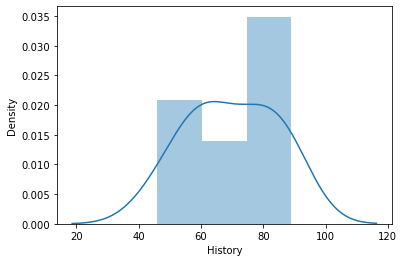

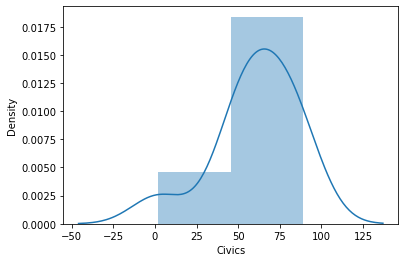

In [37]:
#Distribution plot for all the numeric columns
for i in df.columns[3:]:
    sns.distplot(df[i])
    plt.show()

In [38]:
Maths = df.loc[df['Maths']>=75,['Name','Gender','DOB','Maths']]

In [39]:
Maths.sort_values("Maths", axis = 0, ascending = False,inplace = True)

In [40]:
Maths

,Name,Gender,DOB,Maths
9,Mukesh,M,2/9/1989,96
3,Jessica,F,12/8/1990,78
1,Suresh,M,4/5/1987,75


###### Observations: Mukesh scored the highest Maths Marks in the class

In [41]:
total_marks = df["Maths"] + df["Physics"] + df["English"] + df["Biology"] + df["Economics"] + df["History"] + df["Civics"]
df["total_marks"] = total_marks
df

,Name,Gender,DOB,Maths,Physics,Chemistry,English,Biology,Economics,History,Civics,total_marks
0,John,M,5/4/1988,55,45,56,87,21,52,89,65,414
1,Suresh,M,4/5/1987,75,96,78,64,90,61,58,2,446
2,Ramesh,M,25/5/1989,25,54,89,76,95,87,56,74,467
3,Jessica,F,12/8/1990,78,96,86,63,54,89,75,45,500
4,Jennifer,F,2/9/1989,58,96,78,46,96,77,83,53,509
5,Annu,F,5/4/1988,45,87,52,89,55,89,87,52,504
6,pooja,F,4/5/1987,55,64,61,58,75,58,64,61,435
7,Ritesh,M,25/5/1989,54,76,87,56,25,56,76,87,430
8,Farha,F,12/8/1990,55,63,89,75,78,75,63,89,498
9,Mukesh,M,2/9/1989,96,46,77,83,58,83,46,77,489


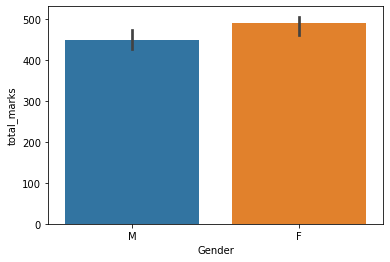

In [42]:
sns.barplot(x=df['Gender'],y=df['total_marks'],data=df);

###### Female students have scored highest marks

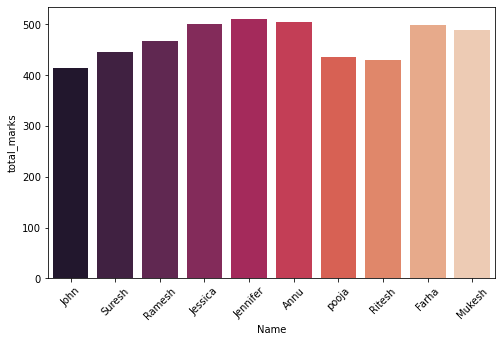

In [43]:
plt.figure(figsize=(8,5))
sns.barplot(x=df['Name'],y=df['total_marks'],data=df,palette='rocket')
plt.xticks(rotation = 45);

###### Observations: Jessica,Jennifer and Farha has scored equal marks.

### Maximum marks in each subject

In [44]:
maximum_marks = df.iloc[:,3:-2].max()
maximum_marks

Maths        96
Physics      96
Chemistry    89
English      89
Biology      96
Economics    89
History      89
dtype: int64

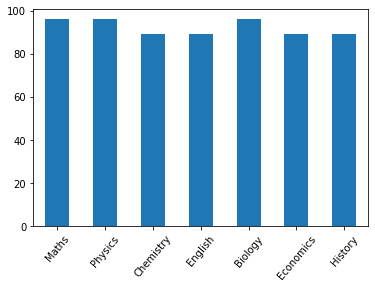

In [45]:
maximum_marks.plot.bar()
plt.xticks(rotation = 50);

### Minimum marks in each subject

In [46]:
minimum_marks = df.iloc[:,3:-2].min()
minimum_marks

Maths        25
Physics      45
Chemistry    52
English      46
Biology      21
Economics    52
History      46
dtype: int64

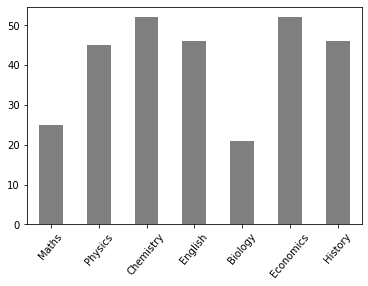

In [47]:
minimum_marks.plot.bar(color = 'grey')
plt.xticks(rotation = 50);

In [48]:
df.dtypes

Name           object
Gender         object
DOB            object
Maths           int64
Physics         int64
Chemistry       int64
English         int64
Biology         int64
Economics       int64
History         int64
Civics          int64
total_marks     int64
dtype: object

# Checking for Outliers

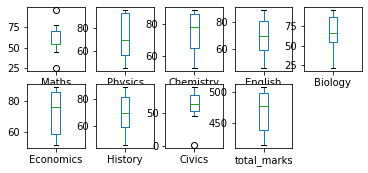

In [49]:
df.plot(kind='box',subplots=True,layout=(3,5))
plt.show()

###### Observations: There are no outliers in the dataset

In [50]:
# Saving to a dataframe
df.to_csv("Student_Marks_EDA.csv")

In [51]:
# EDA(Exploratory data analysis) project ends here